In [1]:
# 출력이 너무 길어지지 않게하기 위해 찍지 않도록 했으나 
# 실제 학습 할 때는 아래 두 줄을 주석처리 하는 것을 권장한다.
#import warnings
#warnings.filterwarnings('ignore')
import pandas as pd

train = pd.read_csv('C:/kaggle/labeledTrainData.tsv', 
                    header=0, delimiter='\t', quoting=3)
test = pd.read_csv('C:/kaggle/example.tsv', 
                   header=0, delimiter='\t', quoting=3)
unlabeled_train = pd.read_csv('C:/kaggle/unlabeledTrainData.tsv', 
                              header=0, delimiter='\t', quoting=3)

print(train.shape)
print(test.shape)
print(unlabeled_train.shape)

print(train['review'].size)
print(test['review'].size)
print(unlabeled_train['review'].size)

(25000, 3)
(20, 2)
(50000, 2)
25000
20
50000


In [2]:
test

,id,review
0,2,Taste and smell way too overwhelming for a tod...
1,3,I received my oil today and the bubble wrap ar...
2,4,Seems to be a quality product. No complaints t...
3,5,Very fishy. Tried based on other reviews but i...
4,6,It has the ingredients I was looking for but t...
5,7,This is the cost-effective solution the the Ba...
6,8,"I'm sure this is a great general supplement, b..."
7,9,Strong strawberry taste . It also does not com...
8,10,We have not noticed any changes since starting...
9,11,I noticed not one person asking about the PROP...


In [3]:
train.head()

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."


In [4]:
unlabeled_train.head()

,id,review
0,"""9999_0""","""Watching Time Chasers, it obvious that it was..."
1,"""45057_0""","""I saw this film about 20 years ago and rememb..."
2,"""15561_0""","""Minor Spoilers<br /><br />In New York, Joan B..."
3,"""7161_0""","""I went to see this film with a great deal of ..."
4,"""43971_0""","""Yes, I agree with everyone on this site this ..."


In [5]:
from KaggleUtility import Utility

In [6]:
Utility.review_to_wordlist(train['review'][0])[:10]

['with', 'all', 'this', 'stuff', 'go', 'down', 'at', 'the', 'moment', 'with']

In [7]:
sentences = []
for review in train["review"]:
    sentences += Utility.review_to_sentences(review, remove_stopwords=False)

C:\Anaconda3\lib\site-packages\bs4\__init__.py:273: UserWarning: "b'.'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)
C:\Anaconda3\lib\site-packages\bs4\__init__.py:273: UserWarning: "b'...'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)
C:\Anaconda3\lib\site-packages\bs4\__init__.py:336: UserWarning: "http://www.happierabroad.com"" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup


In [8]:
len(sentences)

266551

In [9]:
for review in unlabeled_train["review"]:
    sentences += Utility.review_to_sentences(review, remove_stopwords=False)

C:\Anaconda3\lib\site-packages\bs4\__init__.py:336: UserWarning: "http://www.archive.org/details/LovefromaStranger"" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
C:\Anaconda3\lib\site-packages\bs4\__init__.py:336: UserWarning: "http://www.loosechangeguide.com/LooseChangeGuide.html"" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
C:\Anaconda3\lib\site-packages\bs4\__init__.py:273: UserWarning: "b'... ...'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)
C:\Anaconda3\lib\site-packages\bs4\__init__.py:273: U

In [10]:
len(sentences)

795538

In [11]:
sentences[0][:10]

['with', 'all', 'this', 'stuff', 'go', 'down', 'at', 'the', 'moment', 'with']

In [12]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [13]:
# 파라메터값 지정
num_features = 300 # 문자 벡터 차원 수
min_word_count = 40 # 최소 문자 수
num_workers = 4 # 병렬 처리 스레드 수
context = 10 # 문자열 창 크기
downsampling = 1e-3 # 문자 빈도 수 Downsample

# 초기화 및 모델 학습
from gensim.models import word2vec

# 모델 학습
model = word2vec.Word2Vec(sentences, 
                          workers=num_workers, 
                          size=num_features, 
                          min_count=min_word_count,
                          window=context,
                          sample=downsampling)
model

2019-02-07 16:51:23,793 : INFO : 'pattern' package not found; tag filters are not available for English
2019-02-07 16:51:23,805 : INFO : collecting all words and their counts
2019-02-07 16:51:23,806 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-02-07 16:51:23,864 : INFO : PROGRESS: at sentence #10000, processed 225803 words, keeping 12465 word types
2019-02-07 16:51:23,914 : INFO : PROGRESS: at sentence #20000, processed 451892 words, keeping 17070 word types
2019-02-07 16:51:23,961 : INFO : PROGRESS: at sentence #30000, processed 671314 words, keeping 20370 word types
2019-02-07 16:51:24,021 : INFO : PROGRESS: at sentence #40000, processed 897814 words, keeping 23125 word types
2019-02-07 16:51:24,078 : INFO : PROGRESS: at sentence #50000, processed 1116962 words, keeping 25365 word types
2019-02-07 16:51:24,124 : INFO : PROGRESS: at sentence #60000, processed 1338403 words, keeping 27283 word types
2019-02-07 16:51:24,188 : INFO : PROGRESS: at senten

2019-02-07 16:51:27,609 : INFO : PROGRESS: at sentence #710000, processed 15880377 words, keeping 82561 word types
2019-02-07 16:51:27,654 : INFO : PROGRESS: at sentence #720000, processed 16105664 words, keeping 83037 word types
2019-02-07 16:51:27,698 : INFO : PROGRESS: at sentence #730000, processed 16332045 words, keeping 83572 word types
2019-02-07 16:51:27,742 : INFO : PROGRESS: at sentence #740000, processed 16553078 words, keeping 84128 word types
2019-02-07 16:51:27,785 : INFO : PROGRESS: at sentence #750000, processed 16771405 words, keeping 84600 word types
2019-02-07 16:51:27,829 : INFO : PROGRESS: at sentence #760000, processed 16990809 words, keeping 85069 word types
2019-02-07 16:51:27,874 : INFO : PROGRESS: at sentence #770000, processed 17217946 words, keeping 85645 word types
2019-02-07 16:51:27,920 : INFO : PROGRESS: at sentence #780000, processed 17448092 words, keeping 86161 word types
2019-02-07 16:51:27,968 : INFO : PROGRESS: at sentence #790000, processed 176751

2019-02-07 16:52:11,215 : INFO : EPOCH 4 - PROGRESS: at 38.91% examples, 992162 words/s, in_qsize 7, out_qsize 0
2019-02-07 16:52:12,219 : INFO : EPOCH 4 - PROGRESS: at 47.34% examples, 1007699 words/s, in_qsize 7, out_qsize 0
2019-02-07 16:52:13,221 : INFO : EPOCH 4 - PROGRESS: at 54.99% examples, 1004753 words/s, in_qsize 7, out_qsize 0
2019-02-07 16:52:14,231 : INFO : EPOCH 4 - PROGRESS: at 61.97% examples, 991724 words/s, in_qsize 7, out_qsize 0
2019-02-07 16:52:15,232 : INFO : EPOCH 4 - PROGRESS: at 69.82% examples, 993702 words/s, in_qsize 7, out_qsize 0
2019-02-07 16:52:16,234 : INFO : EPOCH 4 - PROGRESS: at 78.15% examples, 1001635 words/s, in_qsize 7, out_qsize 0
2019-02-07 16:52:17,252 : INFO : EPOCH 4 - PROGRESS: at 86.02% examples, 1000877 words/s, in_qsize 7, out_qsize 0
2019-02-07 16:52:18,254 : INFO : EPOCH 4 - PROGRESS: at 93.01% examples, 992495 words/s, in_qsize 7, out_qsize 0
2019-02-07 16:52:19,152 : INFO : worker thread finished; awaiting finish of 3 more threads
2

In [14]:
# 학습이 완료 되면 필요없는 메모리를 unload 시킨다.
model.init_sims(replace=True)

model_name = '300features_40minwords_10text'
# model_name = '300features_50minwords_20text'
model.save(model_name)

2019-02-07 16:53:58,621 : INFO : precomputing L2-norms of word weight vectors
2019-02-07 16:53:58,739 : INFO : saving Word2Vec object under 300features_40minwords_10text, separately None
2019-02-07 16:53:58,740 : INFO : not storing attribute vectors_norm
2019-02-07 16:53:58,741 : INFO : not storing attribute cum_table
2019-02-07 16:53:59,118 : INFO : saved 300features_40minwords_10text


In [15]:
# 유사도가 없는 단어 추출
model.wv.doesnt_match("france england germany berlin".split())

2019-02-07 16:55:10,366 : WARNING : vectors for words {'france', 'germany'} are not present in the model, ignoring these words


'berlin'

In [16]:
# 가장 유사한 단어를 추출
model.wv.most_similar("man")

[('woman', 0.6298583745956421),
 ('businessman', 0.5223996639251709),
 ('lad', 0.5195643305778503),
 ('ladi', 0.49939000606536865),
 ('millionair', 0.49880319833755493),
 ('farmer', 0.4801294207572937),
 ('widow', 0.46766507625579834),
 ('boxer', 0.4599803388118744),
 ('men', 0.4576369524002075),
 ('priest', 0.4547206461429596)]

In [17]:
# Word2Vec으로 벡터화 한 단어를 t-SNE 를 통해 시각화

# 참고 https://stackoverflow.com/questions/43776572/visualise-word2vec-generated-from-gensim
from sklearn.manifold import TSNE
import matplotlib as mpl
import matplotlib.pyplot as plt
import gensim 
import gensim.models as g

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

model_name = '300features_40minwords_10text'
model = g.Doc2Vec.load(model_name)

vocab = list(model.wv.vocab)
X = model[vocab]

print(len(X))
print(X[0][:10])
tsne = TSNE(n_components=2)

# 100개의 단어에 대해서만 시각화
X_tsne = tsne.fit_transform(X[:100,:])
# X_tsne = tsne.fit_transform(X)


2019-02-07 17:07:14,718 : INFO : loading Doc2Vec object from 300features_40minwords_10text
2019-02-07 17:07:14,979 : INFO : loading wv recursively from 300features_40minwords_10text.wv.* with mmap=None
2019-02-07 17:07:14,980 : INFO : setting ignored attribute vectors_norm to None
2019-02-07 17:07:14,980 : INFO : loading vocabulary recursively from 300features_40minwords_10text.vocabulary.* with mmap=None
2019-02-07 17:07:14,981 : INFO : loading trainables recursively from 300features_40minwords_10text.trainables.* with mmap=None
2019-02-07 17:07:14,982 : INFO : setting ignored attribute cum_table to None
2019-02-07 17:07:14,983 : INFO : loaded 300features_40minwords_10text
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


11986
[ 0.02399565 -0.02906841 -0.06704022  0.0701605   0.02981392  0.00387678
  0.04433387 -0.09781753 -0.09390901  0.03326601]


In [18]:
df = pd.DataFrame(X_tsne, index=vocab[:100], columns=['x', 'y'])
df.head()

,x,y
with,-7.113444,-6.546381
all,3.622525,-2.769243
this,0.297409,-2.296771
stuff,-1.184389,2.766552
go,-7.635635,-0.988203


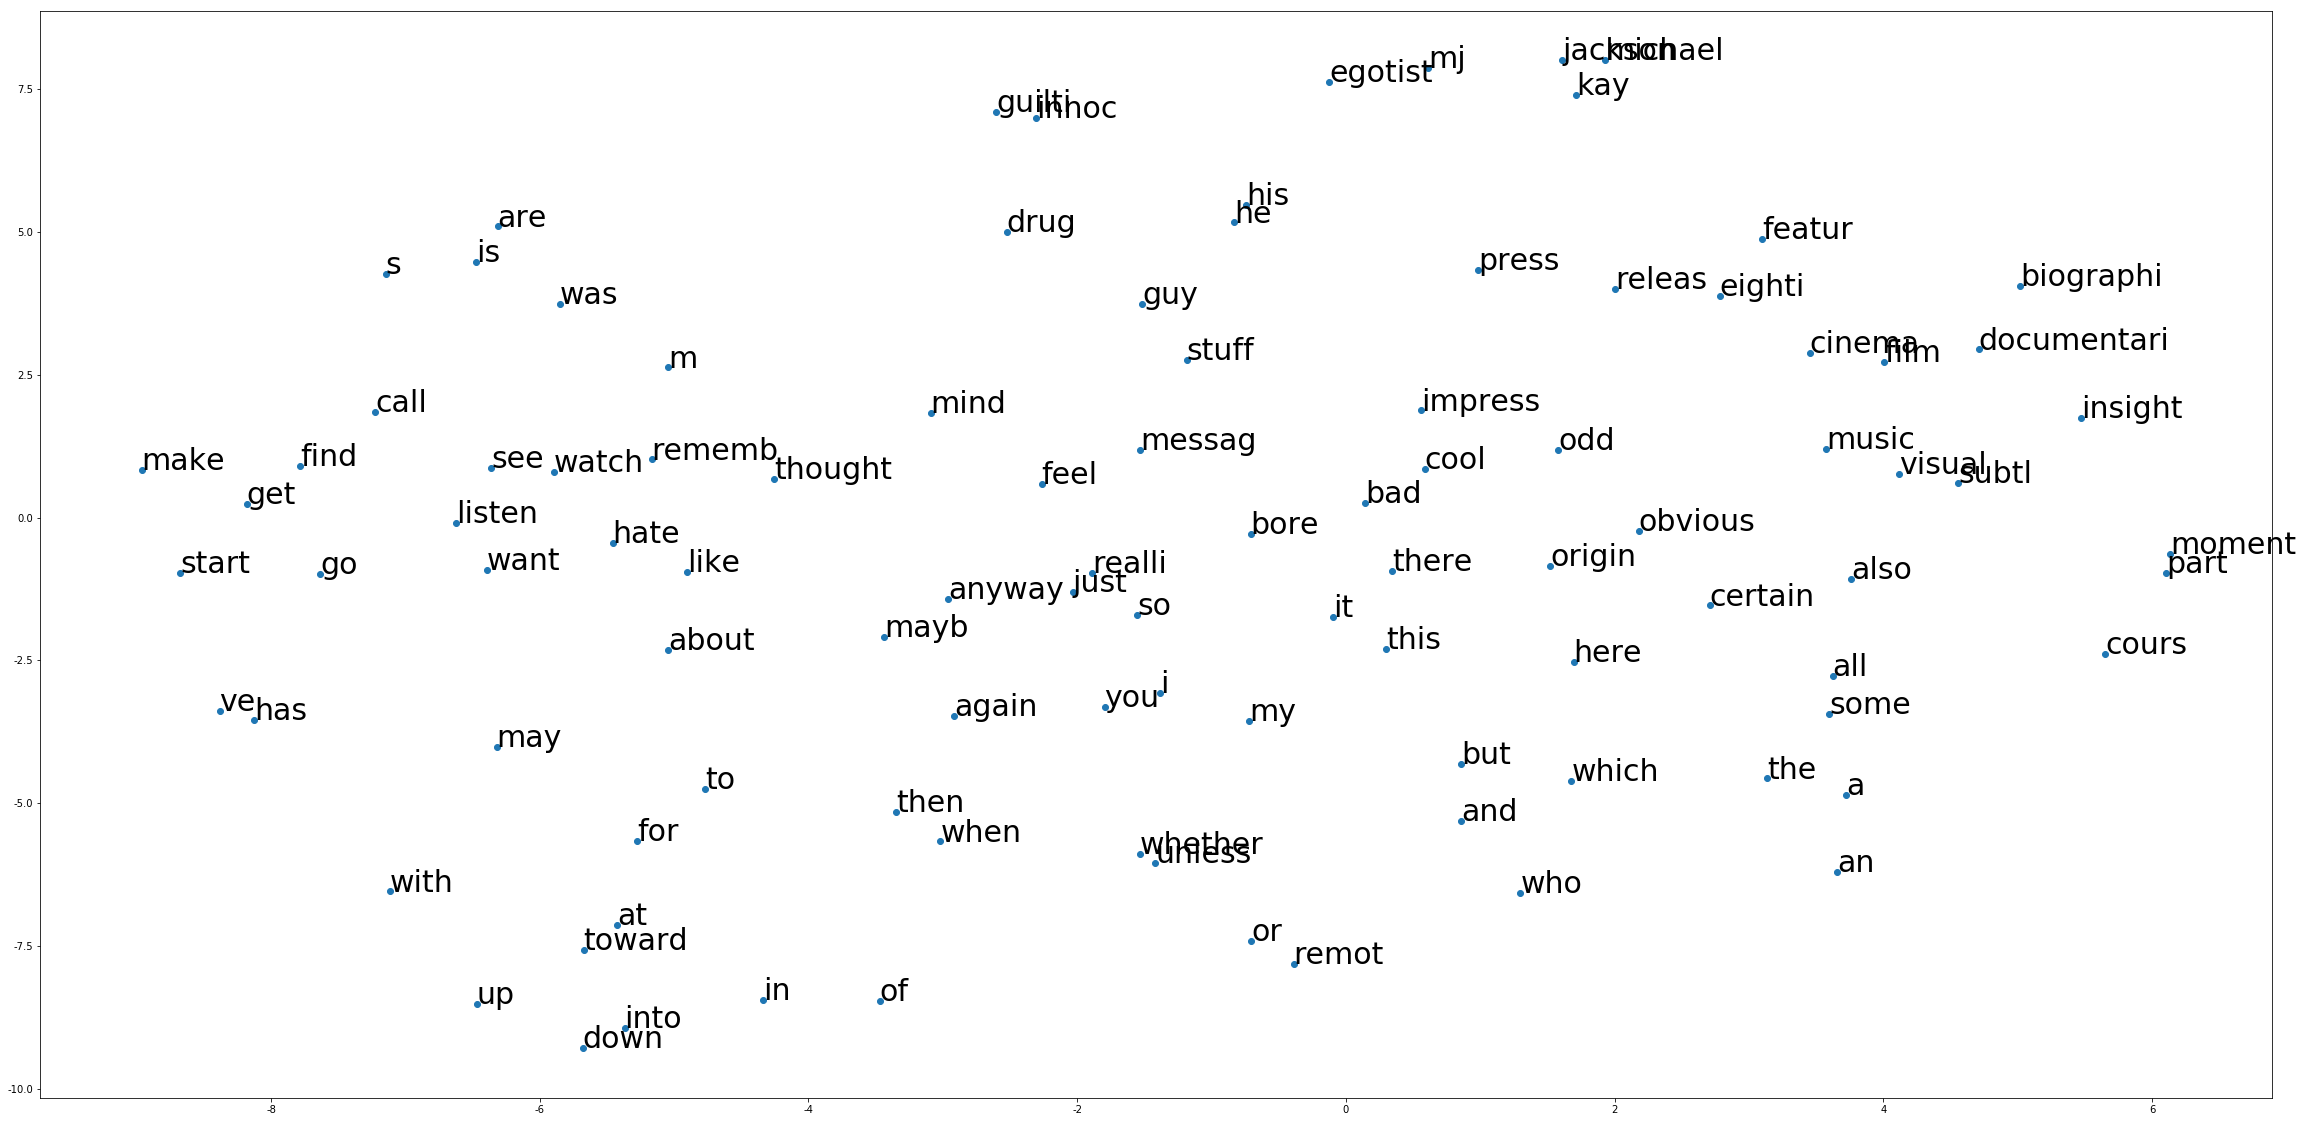

In [19]:
fig = plt.figure()
fig.set_size_inches(40, 20)
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'])

for word, pos in df.iterrows():
    ax.annotate(word, pos, fontsize=30)
plt.show()

In [24]:
import numpy as np

def makeFeatureVec(words, model, num_features):
    """
    주어진 문장에서 단어 벡터의 평균을 구하는 함수
    """
    # 속도를 위해 0으로 채운 배열로 초기화 한다.
    featureVec = np.zeros((num_features,),dtype="float32")

    nwords = 0.
    # Index2word는 모델의 사전에 있는 단어명을 담은 리스트이다.
    # 속도를 위해 set 형태로 초기화 한다.
    index2word_set = set(model.wv.index2word)
    # 루프를 돌며 모델 사전에 포함이 되는 단어라면 피처에 추가한다.
    for word in words:
        if word in index2word_set:
            nwords = nwords + 1.
            featureVec = np.add(featureVec,model[word])
    # 결과를 단어수로 나누어 평균을 구한다.
    featureVec = np.divide(featureVec,nwords)
    return featureVec

In [25]:
def getAvgFeatureVecs(reviews, model, num_features):
    # 리뷰 단어 목록의 각각에 대한 평균 feature 벡터를 계산하고 
    # 2D numpy 배열을 반환한다.
    
    # 카운터를 초기화 한다.
    counter = 0.
    # 속도를 위해 2D 넘파이 배열을 미리 할당한다.
    reviewFeatureVecs = np.zeros(
        (len(reviews),num_features),dtype="float32")
    
    for review in reviews:
       # 매 1000개 리뷰마다 상태를 출력
       if counter%1000. == 0.:
           print("Review %d of %d" % (counter, len(reviews)))
       # 평균 피처 벡터를 만들기 위해 위에서 정의한 함수를 호출한다.
       reviewFeatureVecs[int(counter)] = makeFeatureVec(review, model, \
           num_features)
       # 카운터를 증가시킨다.
       counter = counter + 1.
    return reviewFeatureVecs

In [28]:
# 멀티스레드로 4개의 워커를 사용해 처리한다.
def getCleanReviews(reviews):
    clean_reviews = []
    clean_reviews = Utility.apply_by_multiprocessing(reviews["review"], Utility.review_to_wordlist, workers=4)
    return clean_reviews

In [29]:
%time trainDataVecs = getAvgFeatureVecs(getCleanReviews(train), model, num_features )

Review 0 of 25000


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


Review 1000 of 25000
Review 2000 of 25000
Review 3000 of 25000
Review 4000 of 25000
Review 5000 of 25000
Review 6000 of 25000
Review 7000 of 25000
Review 8000 of 25000
Review 9000 of 25000
Review 10000 of 25000
Review 11000 of 25000
Review 12000 of 25000
Review 13000 of 25000
Review 14000 of 25000
Review 15000 of 25000
Review 16000 of 25000
Review 17000 of 25000
Review 18000 of 25000
Review 19000 of 25000
Review 20000 of 25000
Review 21000 of 25000
Review 22000 of 25000
Review 23000 of 25000
Review 24000 of 25000
Wall time: 1min 11s


In [30]:
%time testDataVecs = getAvgFeatureVecs(getCleanReviews(test), model, num_features )

Review 0 of 20
Wall time: 3.38 s


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


In [31]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators = 200, n_jobs = -1, random_state=2018)

In [32]:
%time forest = forest.fit( trainDataVecs, train["sentiment"] )

Wall time: 13 s


In [33]:
from sklearn.model_selection import cross_val_score
%time score = np.mean(cross_val_score(forest, trainDataVecs, train['sentiment'], cv=10, scoring='roc_auc'))

Wall time: 1min 55s


In [34]:
score

0.903403456

In [35]:
result = forest.predict( testDataVecs )

In [36]:
output = pd.DataFrame( data={"id":test["id"], "sentiment":result} )
output.to_csv('data/word2vectest.csv'.format(score), index=False, quoting=3 )

In [37]:
#### K-means ####

import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier

from bs4 import BeautifulSoup
import re
import time

from nltk.corpus import stopwords
import nltk.data

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [38]:
model = Word2Vec.load('300features_40minwords_10text')
model

2019-02-07 19:58:29,546 : INFO : loading Word2Vec object from 300features_40minwords_10text
2019-02-07 19:58:29,797 : INFO : loading wv recursively from 300features_40minwords_10text.wv.* with mmap=None
2019-02-07 19:58:29,797 : INFO : setting ignored attribute vectors_norm to None
2019-02-07 19:58:29,812 : INFO : loading vocabulary recursively from 300features_40minwords_10text.vocabulary.* with mmap=None
2019-02-07 19:58:29,812 : INFO : loading trainables recursively from 300features_40minwords_10text.trainables.* with mmap=None
2019-02-07 19:58:29,814 : INFO : setting ignored attribute cum_table to None
2019-02-07 19:58:29,814 : INFO : loaded 300features_40minwords_10text


In [39]:
# 숫자로 단어를 표현
# Word2Vec 모델은 어휘의 각 단어에 대한 feature 벡터로 구성되며 
# 'syn0'이라는 넘파이 배열로 저장된다.
# syn0의 행 수는 모델 어휘의 단어 수
# 컬럼 수는 2 부에서 설정 한 피처 벡터의 크기
type(model.wv.syn0)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  


numpy.ndarray

In [40]:
# syn0의 행 수는 모델 어휘의 단어 수
# 열 수는 2부에서 설정한 특징 벡터의 크기
model.wv.syn0.shape

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  This is separate from the ipykernel package so we can avoid doing imports until


(11986, 300)

In [41]:
# 개별 단어 벡터 접근
model.wv['flower'].shape

(300,)

In [42]:
model.wv['flower'][:10]

array([-0.11381162, -0.08161184, -0.02321761,  0.03785877, -0.06243423,
       -0.07022057, -0.01582411, -0.02596163, -0.07053345, -0.0422224 ],
      dtype=float32)

In [43]:
#### K-means (K평균)클러스터링으로 데이터 묶기 ####

In [44]:
# 단어 벡터에서 k-means를 실행하고 일부 클러스터를 찍어본다.
start = time.time() # 시작시간

# 클러스터의 크기 "k"를 어휘 크기의 1/5 이나 평균 5단어로 설정한다.
word_vectors = model.wv.syn0 # 어휘의 feature vector
num_clusters = word_vectors.shape[0] / 5
num_clusters = int(num_clusters)

# K means 를 정의하고 학습시킨다.
kmeans_clustering = KMeans( n_clusters = num_clusters )
idx = kmeans_clustering.fit_predict( word_vectors )

# 끝난시간에서 시작시간을 빼서 걸린 시간을 구한다.
end = time.time()
elapsed = end - start
print("Time taken for K Means clustering: ", elapsed, "seconds.")

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  """


Time taken for K Means clustering:  386.98606514930725 seconds.


In [45]:
# 각 어휘 단어를 클러스터 번호에 매핑되게 word/Index 사전을 만든다.
idx = list(idx)
names = model.wv.index2word
word_centroid_map = {names[i]: idx[i] for i in range(len(names))}
#     word_centroid_map = dict(zip( model.wv.index2word, idx ))

# 첫번째 클러스터의 처음 10개를 출력
for cluster in range(0,10):
    # 클러스터 번호를 출력
    print("\nCluster {}".format(cluster))
    
    # 클러스터번호와 클러스터에 있는 단어를 찍는다.
    words = []
    for i in range(0,len(list(word_centroid_map.values()))):
        if( list(word_centroid_map.values())[i] == cluster ):
            words.append(list(word_centroid_map.keys())[i])
    print(words)


Cluster 0
['merchant', 'fortress', 'outpost', 'detent', 'spitfir']

Cluster 1
['ladd', 'palmer', 'gardner', 'weaver', 'moss', 'ava', 'goddard', 'ozzi', 'perez', 'sigourney', 'hussey', 'paulett']

Cluster 2
['repel', 'heartless', 'brute', 'bystand', 'brutish', 'benign', 'uncar', 'cruelli']

Cluster 3
['pointless', 'random', 'unnecessari', 'useless', 'inappropri', 'irrelev', 'unrel', 'filler', 'superflu', 'unjustifi']

Cluster 4
['slept', 'streak', 'fling', 'threesom', 'courtship', 'frolic', 'tryst']

Cluster 5
['jess', 'rodriguez', 'russo', 'arabia', 'fargo', 'newbi', 'ar', 'keach']

Cluster 6
['fli', 'jump', 'roll', 'flip', 'climb', 'smash', 'float', 'blast', 'melt', 'leap', 'crawl', 'slide', 'bounc', 'grind', 'scrape', 'stomp', 'rattl']

Cluster 7
['wide', 'wider', 'broader']

Cluster 8
['docu']

Cluster 9
['subject', 'issu', 'topic', 'controversi']


In [49]:
"""
판다스로 데이터프레임 형태의 데이터로 읽어온다.
QUOTE_MINIMAL (0), QUOTE_ALL (1), 
QUOTE_NONNUMERIC (2) or QUOTE_NONE (3).

그리고 이전 튜토리얼에서 했던 것처럼 clean_train_reviews 와 
clean_test_reviews 로 텍스트를 정제한다.
"""
train = pd.read_csv('C:/kaggle/labeledTrainData.tsv', header=0, delimiter="\t", quoting=3)
test = pd.read_csv('C:/kaggle/example.tsv', header=0, delimiter="\t", quoting=3)
# unlabeled_train = pd.read_csv( 'data/unlabeledTrainData.tsv', header=0,  delimiter="\t", quoting=3 )

In [50]:
from KaggleUtility import Utility
# 학습 리뷰를 정제한다.
clean_train_reviews = []
for review in train["review"]:
    clean_train_reviews.append(Utility.review_to_wordlist( review, remove_stopwords=True ))

In [51]:
# 테스트 리뷰를 정제한다.
clean_test_reviews = []
for review in test["review"]:
    clean_test_reviews.append(Utility.review_to_wordlist( review, remove_stopwords=True ))

In [52]:
# bags of centroids 생성
# 속도를 위해 centroid 학습 세트 bag을 미리 할당 한다.
train_centroids = np.zeros((train["review"].size, num_clusters), dtype="float32" )

train_centroids[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [53]:
# centroid 는 두 클러스터의 중심점을 정의 한 다음 중심점의 거리를 측정한 것
def create_bag_of_centroids( wordlist, word_centroid_map ):
    
    # 클러스터의 수는 word / centroid map에서 가장 높은 클러스트 인덱스와 같다.
    num_centroids = max( word_centroid_map.values() ) + 1
    
    # 속도를 위해 bag of centroids vector를 미리 할당한다.
    bag_of_centroids = np.zeros( num_centroids, dtype="float32" )
    
    # 루프를 돌며 단어가 word_centroid_map에 있다면
    # 해당되는 클러스터의 수를 하나씩 증가시켜 준다.
    for word in wordlist:
        if word in word_centroid_map:
            index = word_centroid_map[word]
            bag_of_centroids[index] += 1
    
    # bag of centroids를 반환한다.
    return bag_of_centroids

In [54]:
# 학습 리뷰를 bags of centroids 로 변환한다.
counter = 0
for review in clean_train_reviews:
    train_centroids[counter] = create_bag_of_centroids( review, word_centroid_map )
    counter += 1

# 테스트 리뷰도 같은 방법으로 반복해 준다.
test_centroids = np.zeros(( test["review"].size, num_clusters), dtype="float32" )

counter = 0
for review in clean_test_reviews:
    test_centroids[counter] = create_bag_of_centroids( review, word_centroid_map )
    counter += 1


# 랜덤포레스트를 사용하여 학습시키고 예측
forest = RandomForestClassifier(n_estimators = 100)

# train 데이터의 레이블을 통해 학습시키고 예측한다.
# 시간이 좀 소요되기 때문에 %time을 통해 걸린 시간을 찍도록 함
print("Fitting a random forest to labeled training data...")
%time forest = forest.fit(train_centroids, train["sentiment"])

Fitting a random forest to labeled training data...
Wall time: 31.3 s


In [55]:
from sklearn.model_selection import cross_val_score
%time score = np.mean(cross_val_score(forest, train_centroids, train['sentiment'], cv=10, scoring='roc_auc'))

Wall time: 4min 37s


In [56]:
%time result = forest.predict(test_centroids)

Wall time: 9.95 ms


In [57]:
score

0.9099403200000001

In [58]:
# 결과를 csv로 저장
output = pd.DataFrame(data={"id":test["id"], "sentiment":result})
output.to_csv("data/kmeanstest.csv".format(score), index=False, quoting=3)